# Generating and Plotting Distributions, and the Perils of Small Sample-Sizes

In [1]:
# all import modules
import matplotlib.pyplot as plt
import numpy as np

# set some global parameters
np.set_printoptions(suppress=True)

params = {'legend.fontsize': 18,
         'axes.labelsize': 18,
         'axes.titlesize':24,
         'xtick.labelsize':18,
         'ytick.labelsize':18,
         'font.size': 24}
plt.rcParams.update(params)

## Introduction

What happens if I were to roll a 10-sided die again and again - what would the distribution of numbers that came up look like?

What would happen if I were to roll **two** 10-sided dice again and again and took the average of their results?

What if I added more of the same dice into the mix?

In [3]:
def dist_gen(samples=1e6, draws=4, lowBound=0, upBound=100):
    count = []
    samples = int(samples)
    lowBound = int(lowBound)
    upBound = int(upBound)
    for i in range(samples):
        for j in range(draws):
            count.append(np.mean(np.random.randint(lowBound,
                                                   upBound + 1,
                                                   draws)))
    plt.hist(count, bins=range(lowBound, upBound + 2))
    plt.show()
    lq = np.percentile(count, 25)
    uq = np.percentile(count, 75)
    mu = np.mean(count)
    sig = np.std(count)
    tot_N = samples * draws
    snr = np.sqrt(tot_N)
    std_err = mu/np.sqrt(tot_N)
    print(
            'For {0} iterations and {4} draws: '
            'Mean = {1:.1f}, '
            'Sigma = {5:.1f}, '
            'LQ = {2:.1f}, '
            'UQ = {3:.1f}, '
            'SNR = {6:.1f}, '
            'Std. Error = {7:.3f}'
            .format(samples, mu, lq, uq, draws, sig, snr, std_err))
    return samples, draws, mu, sig, lq, uq, snr, std_err

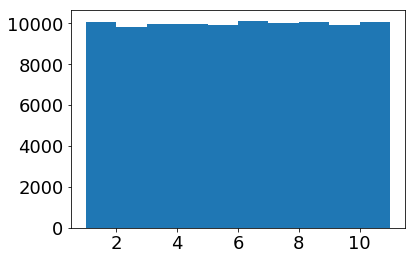

For 100000 iterations and 1 draws: Mean = 5.5, Sigma = 2.9, LQ = 3.0, UQ = 8.0, SNR = 316.2, Std. Error = 0.017


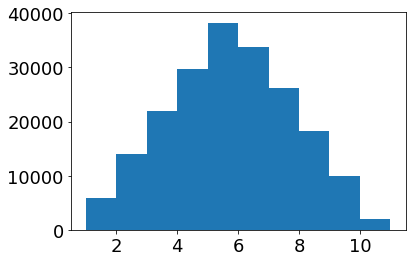

For 100000 iterations and 2 draws: Mean = 5.5, Sigma = 2.0, LQ = 4.0, UQ = 7.0, SNR = 447.2, Std. Error = 0.012


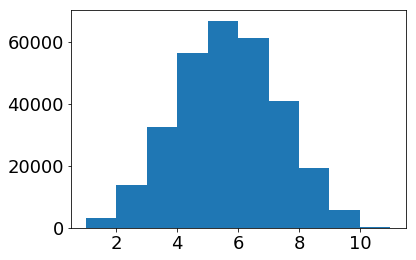

For 100000 iterations and 3 draws: Mean = 5.5, Sigma = 1.7, LQ = 4.3, UQ = 6.7, SNR = 547.7, Std. Error = 0.010


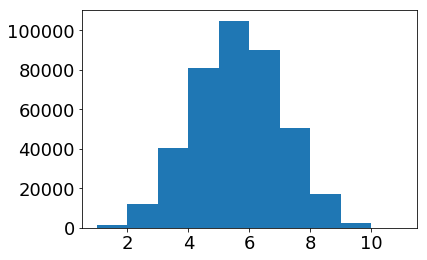

For 100000 iterations and 4 draws: Mean = 5.5, Sigma = 1.4, LQ = 4.5, UQ = 6.5, SNR = 632.5, Std. Error = 0.009


In [4]:
# 10-sided

for i in range(1, 5):
    dist_gen(samples=1e5, draws=i, lowBound=1, upBound=10)

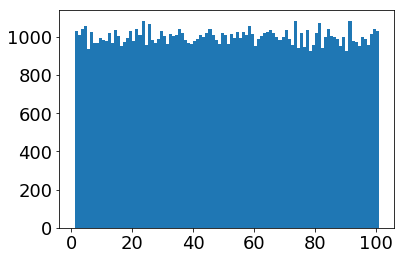

For 100000 iterations and 1 draws: Mean = 50.4, Sigma = 28.8, LQ = 25.0, UQ = 75.0, SNR = 316.2, Std. Error = 0.160


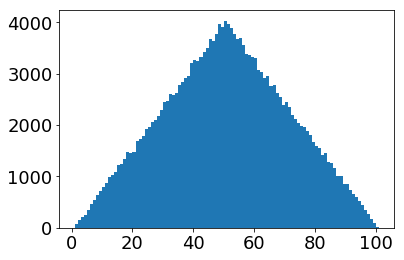

For 100000 iterations and 2 draws: Mean = 50.5, Sigma = 20.4, LQ = 36.0, UQ = 65.0, SNR = 447.2, Std. Error = 0.113


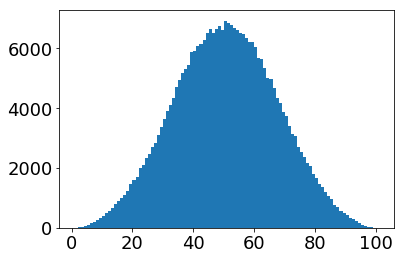

For 100000 iterations and 3 draws: Mean = 50.5, Sigma = 16.7, LQ = 38.7, UQ = 62.3, SNR = 547.7, Std. Error = 0.092


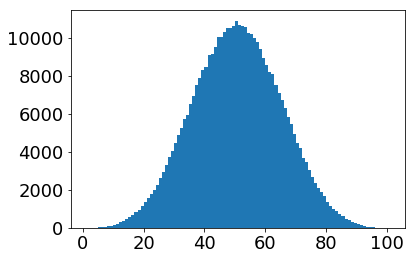

For 100000 iterations and 4 draws: Mean = 50.5, Sigma = 14.4, LQ = 40.5, UQ = 60.5, SNR = 632.5, Std. Error = 0.080


In [5]:
# increase resolution: 100-sided

for i in range(1, 5):
    dist_gen(samples=1e5, draws=i, lowBound=1, upBound=100)

## Shot-Noise

If we roll a fair *n*-sided die *n*-times, in **theory** we should get each number once.

However, does this happen in **practice**? If not, why, and how do we achieve the theoretical result?

### Example: 10-sided die

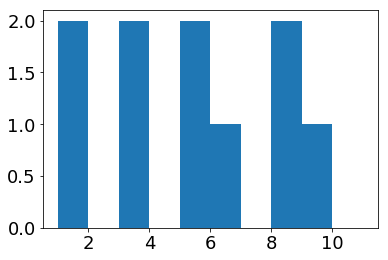

For 10 iterations and 1 draws: Mean = 4.9, Sigma = 2.7, LQ = 3.0, UQ = 7.5, SNR = 3.2, Std. Error = 1.550


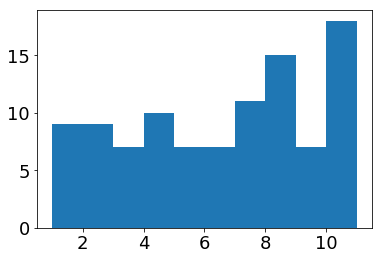

For 100 iterations and 1 draws: Mean = 6.0, Sigma = 3.0, LQ = 3.8, UQ = 8.2, SNR = 10.0, Std. Error = 0.605


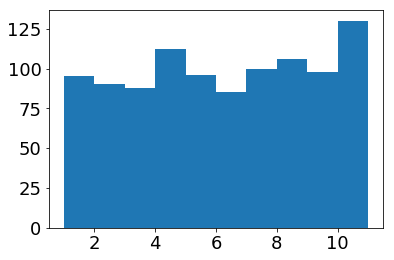

For 1000 iterations and 1 draws: Mean = 5.7, Sigma = 2.9, LQ = 3.0, UQ = 8.0, SNR = 31.6, Std. Error = 0.180


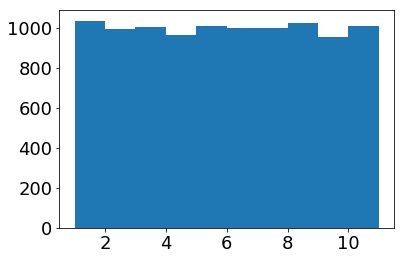

For 10000 iterations and 1 draws: Mean = 5.5, Sigma = 2.9, LQ = 3.0, UQ = 8.0, SNR = 100.0, Std. Error = 0.055


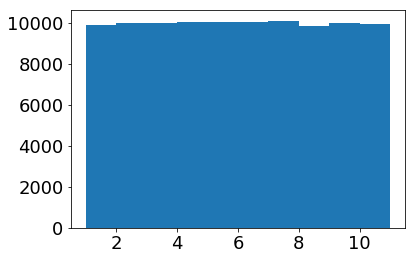

For 100000 iterations and 1 draws: Mean = 5.5, Sigma = 2.9, LQ = 3.0, UQ = 8.0, SNR = 316.2, Std. Error = 0.017


In [6]:
# Shot-noise demonstration

values10 = np.zeros([5,8])

for row, i in enumerate(np.logspace(1, 5, num=5, base=10), start=0):
    values10[row] = dist_gen(samples=i, draws=1, lowBound=1, upBound=10)

### Example: 6-sided die

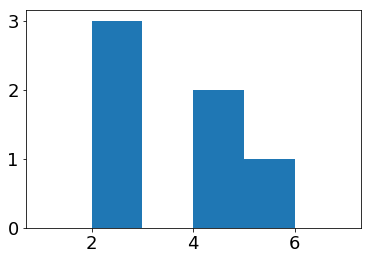

For 6 iterations and 1 draws: Mean = 3.2, Sigma = 1.2, LQ = 2.0, UQ = 4.0, SNR = 2.4, Std. Error = 1.293


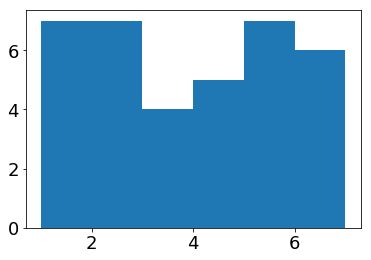

For 36 iterations and 1 draws: Mean = 3.4, Sigma = 1.8, LQ = 2.0, UQ = 5.0, SNR = 6.0, Std. Error = 0.574


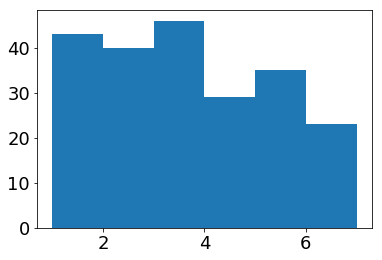

For 216 iterations and 1 draws: Mean = 3.2, Sigma = 1.6, LQ = 2.0, UQ = 5.0, SNR = 14.7, Std. Error = 0.217


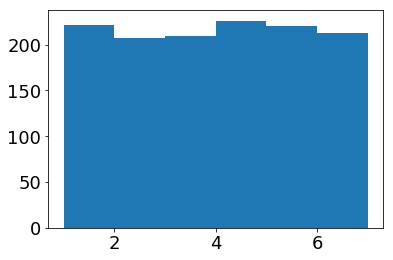

For 1296 iterations and 1 draws: Mean = 3.5, Sigma = 1.7, LQ = 2.0, UQ = 5.0, SNR = 36.0, Std. Error = 0.097


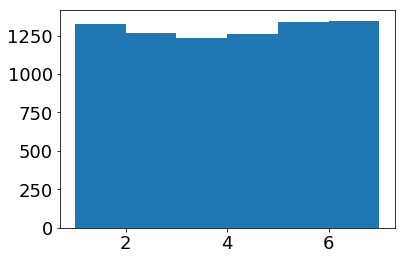

For 7776 iterations and 1 draws: Mean = 3.5, Sigma = 1.7, LQ = 2.0, UQ = 5.0, SNR = 88.2, Std. Error = 0.040


In [7]:
values6 = np.zeros([5,8])

for row, i in enumerate(np.logspace(1, 5, num=5, base=6), start=0):
    values6[row] = dist_gen(samples=i, draws=1, lowBound=1, upBound=6)

### Example: 2-sided coin

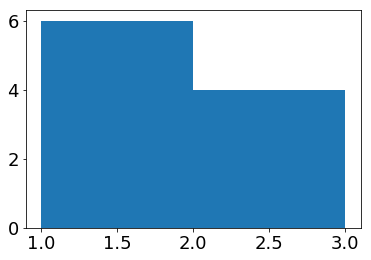

For 10 iterations and 1 draws: Mean = 1.4, Sigma = 0.5, LQ = 1.0, UQ = 2.0, SNR = 3.2, Std. Error = 0.443


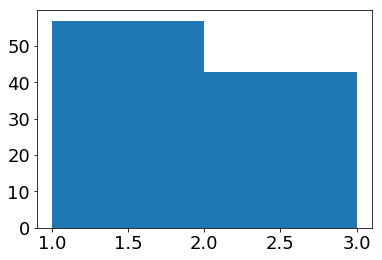

For 100 iterations and 1 draws: Mean = 1.4, Sigma = 0.5, LQ = 1.0, UQ = 2.0, SNR = 10.0, Std. Error = 0.143


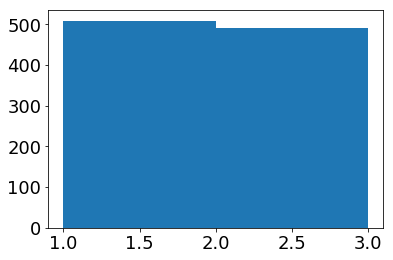

For 1000 iterations and 1 draws: Mean = 1.5, Sigma = 0.5, LQ = 1.0, UQ = 2.0, SNR = 31.6, Std. Error = 0.047


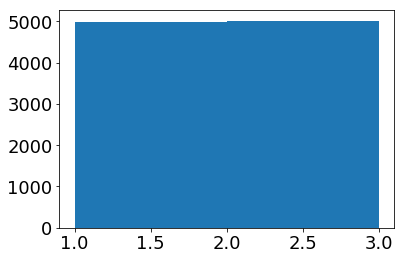

For 10000 iterations and 1 draws: Mean = 1.5, Sigma = 0.5, LQ = 1.0, UQ = 2.0, SNR = 100.0, Std. Error = 0.015


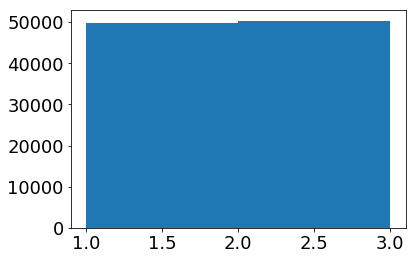

For 100000 iterations and 1 draws: Mean = 1.5, Sigma = 0.5, LQ = 1.0, UQ = 2.0, SNR = 316.2, Std. Error = 0.005


In [8]:
values2 = np.zeros([5,8])

for row, i in enumerate(np.logspace(1, 5, num=5, base=10), start=0):
    values2[row] = dist_gen(samples=i, draws=1, lowBound=1, upBound=2)

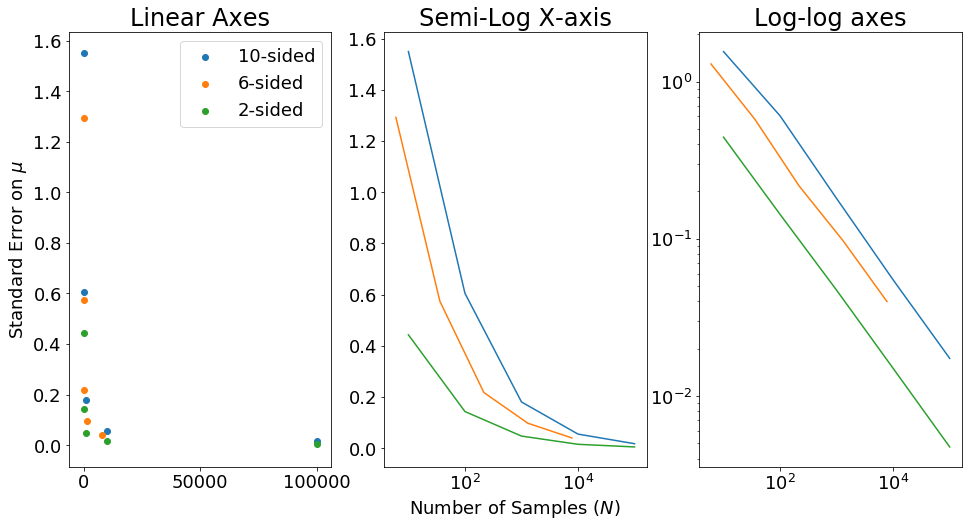

In [9]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(16, 8)

ax[0].scatter(values10[:, 0], values10[:,7], label='10-sided')
ax[1].semilogx(values10[:, 0], values10[:,7])
ax[2].loglog(values10[:, 0], values10[:,7])

ax[0].scatter(values6[:, 0], values6[:,7], label='6-sided')
ax[1].semilogx(values6[:, 0], values6[:,7])
ax[2].loglog(values6[:, 0], values6[:,7])

ax[0].scatter(values2[:, 0], values2[:,7], label='2-sided')
ax[1].semilogx(values2[:, 0], values2[:,7])
ax[2].loglog(values2[:, 0], values2[:,7])

ax[0].legend(loc=0)
ax[0].set_ylabel(r'Standard Error on $\mu$')
ax[1].set_xlabel(r'Number of Samples ($N$)')

ax[0].set_title(r'Linear Axes')
ax[1].set_title(r'Semi-Log X-axis')
ax[2].set_title(r'Log-log axes')

plt.show()